# SURPRISE HOUSING DATA ANALYSIS FOR THE AUSTRALIAN MARKET

## DATA IMPORTING AND DISPLAYING

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the dataset
data_path = 'train.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

## HANDLING THE MISSING VALUES

In [5]:
# Handling missing values by filling numerical columns with the median and categorical columns with the mode
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()

# Summary of missing values after imputation
missing_values_after = data.isnull().sum().sum()

# Checking for outliers by examining the statistical summary again, especially for extreme values
outlier_check = data.describe()

duplicate_rows, missing_values_after, outlier_check


(0,
 0,
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
 count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
 mean    730.500000    56.897260    69.863699   10516.828082     6.099315   
 std     421.610009    42.300571    22.027677    9981.264932     1.382997   
 min       1.000000    20.000000    21.000000    1300.000000     1.000000   
 25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
 50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
 75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
 max    1460.000000   190.000000   313.000000  215245.000000    10.000000   
 
        OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
 count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  ...   
 mean      5.575342  1971.267808   1984.865753   103.117123   443.639726  ...   
 std       1.112799    30.202904     20.645407   180.7

## VISUALISING OUTLIERS

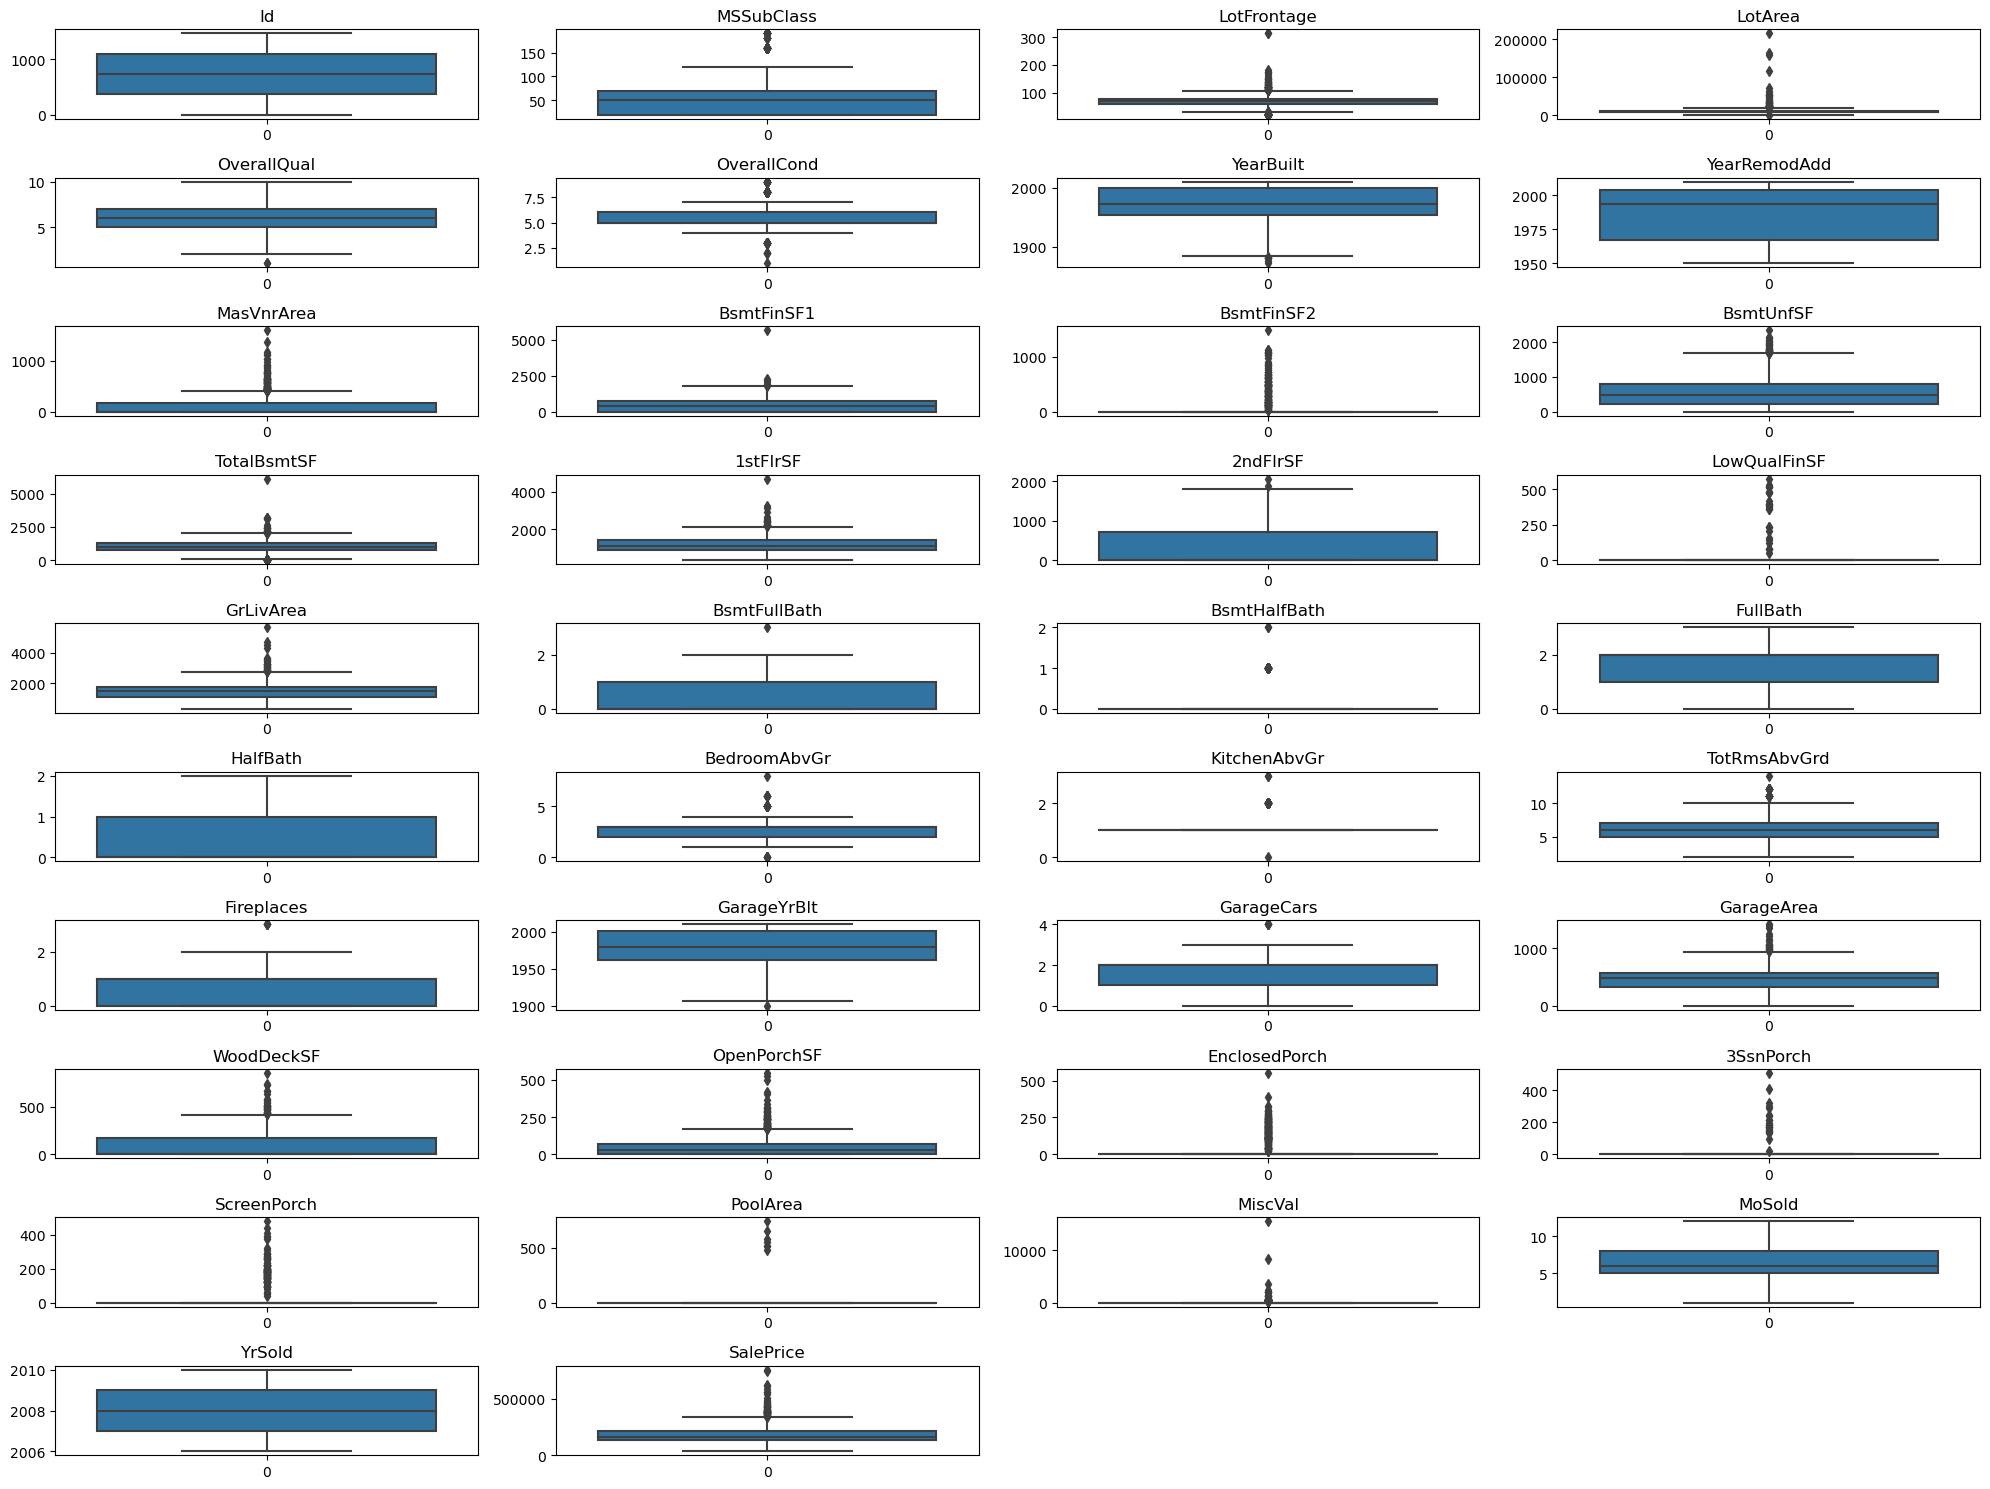

In [6]:

# Selecting numeric columns to visualize for outliers
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Setting up the plot
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 4, i+1)
    sns.boxplot(data=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## CALCULATING THE 99TH PERCENTILE FOR THE LOT AREA

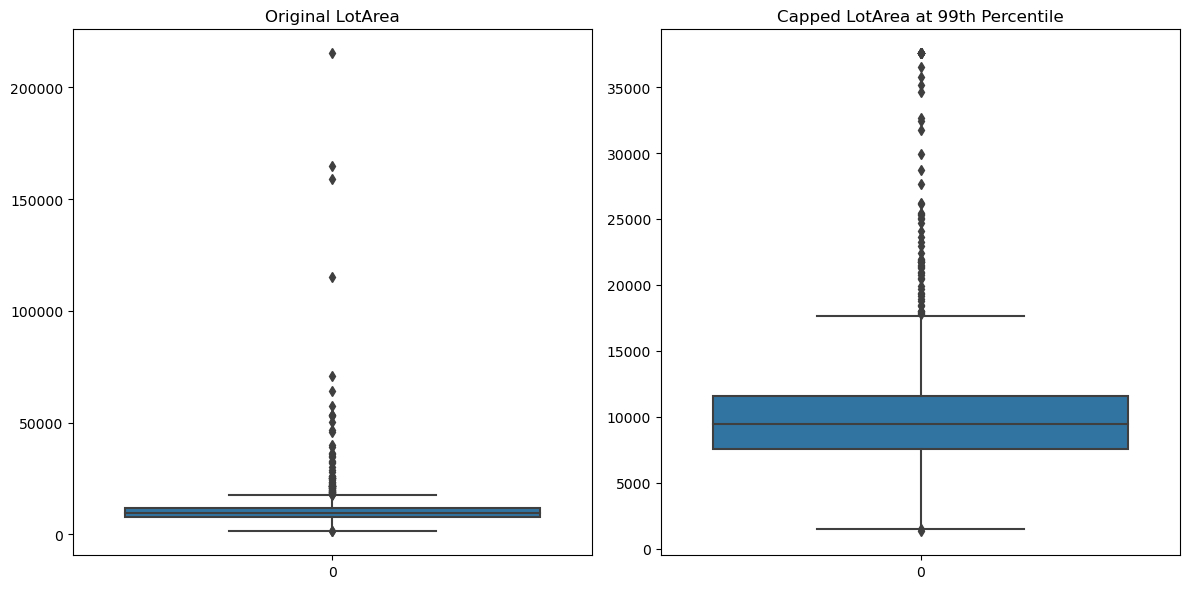

In [7]:
# Calculate the 99th percentile for LotArea
lot_area_99th_percentile = data['LotArea'].quantile(0.99)

# Cap values at the 99th percentile
data['LotArea_Capped'] = data['LotArea'].clip(upper=lot_area_99th_percentile)

# Plotting the original vs capped LotArea to see the effect
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data['LotArea'])
plt.title('Original LotArea')

plt.subplot(1, 2, 2)
sns.boxplot(data=data['LotArea_Capped'])
plt.title('Capped LotArea at 99th Percentile')

plt.tight_layout()
plt.show()

## IDENTIFYING CATEGORICAL VARIABLES AND CREATING DUMMY VARIABLES

In [8]:
categorical_vars = data.select_dtypes(include=['object']).columns
data_with_dummies = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# Display the new dataframe to verify dummy variables are created
data_with_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


## DERIVING NEW METRIC 'HOUSEAGE' AT THE TIME OF SALE

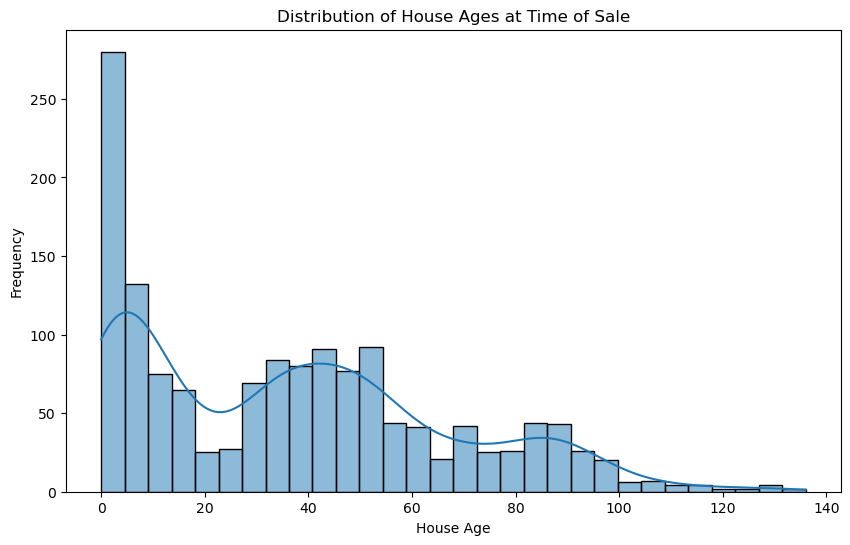

In [9]:
data_with_dummies['HouseAge'] = data_with_dummies['YrSold'] - data_with_dummies['YearBuilt']

# Histogram of HouseAge to see the distribution of age of houses at the time of sale
plt.figure(figsize=(10, 6))
sns.histplot(data_with_dummies['HouseAge'], bins=30, kde=True)
plt.title('Distribution of House Ages at Time of Sale')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.show()

## SCATTER PLOT OF HOUSEAGE VS SALEPRICE & CORRELATION MATRIX FOR SELECTED VARIABLES

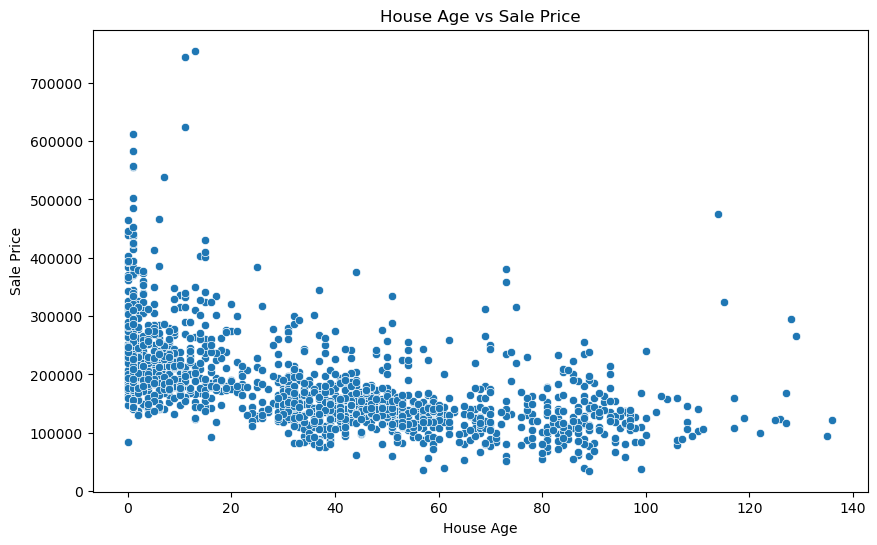

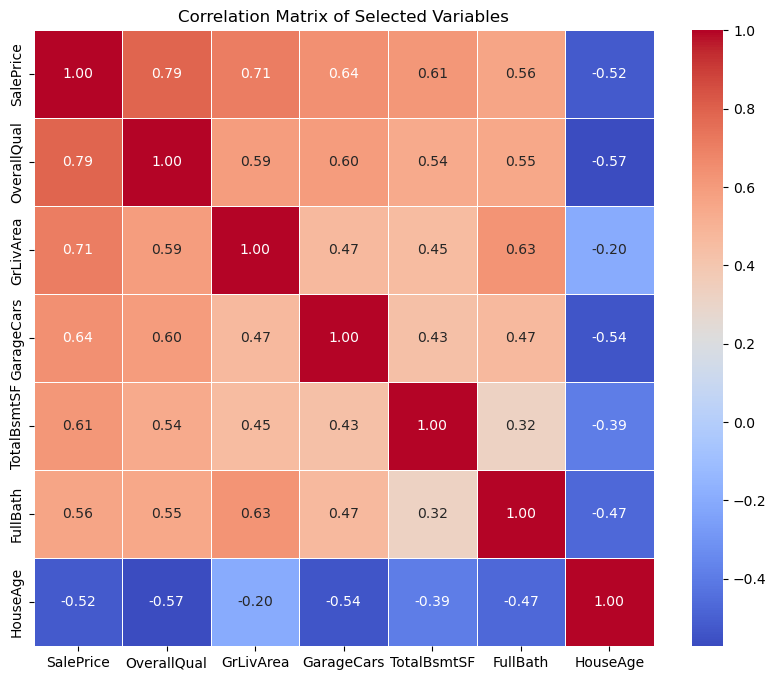

In [10]:
# Scatter plot of HouseAge vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HouseAge', y='SalePrice', data=data_with_dummies)
plt.title('House Age vs Sale Price')
plt.xlabel('House Age')
plt.ylabel('Sale Price')
plt.show()

# Correlation matrix for a few selected variables including SalePrice
key_variables = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'HouseAge']
correlation_matrix = data_with_dummies[key_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

## ANALYSIS OF NEIGHBOURHOODS ON SALE PRICES AND EFFECT OF RENOVATIONS

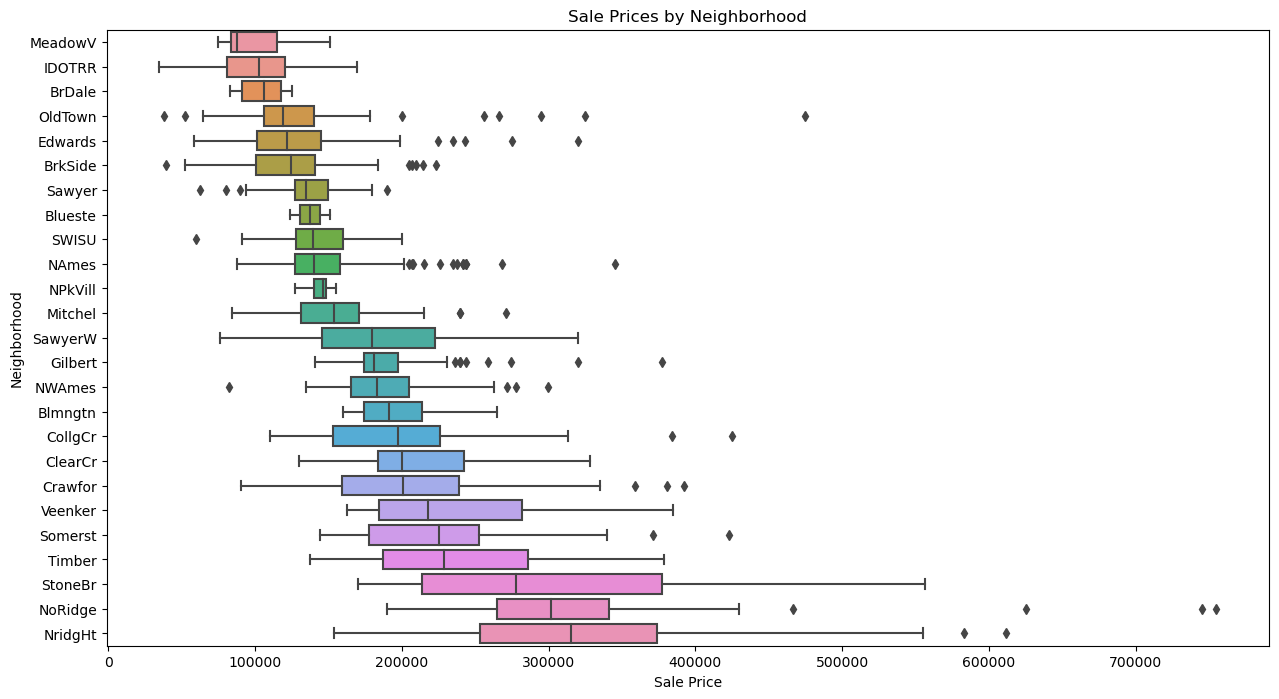

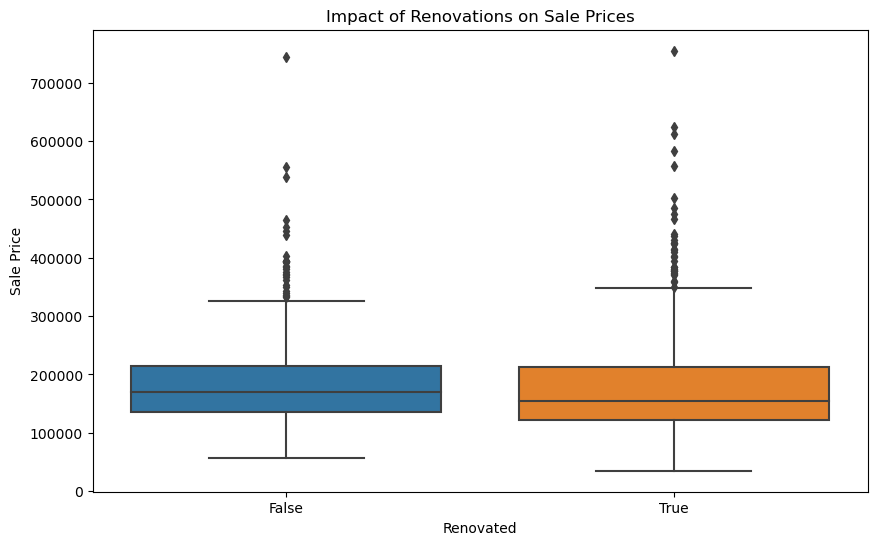

In [11]:
data_original = pd.read_csv(data_path)

# Adding the 'HouseAge' and 'Renovated' columns to the original data for consistency
data_original['HouseAge'] = data_original['YrSold'] - data_original['YearBuilt']
data_original['Renovated'] = data_original['YearRemodAdd'] != data_original['YearBuilt']

# 1. Comparative Analysis of Neighborhoods on Sale Prices
plt.figure(figsize=(15, 8))
sorted_neighborhoods = data_original.groupby('Neighborhood')['SalePrice'].median().sort_values()
sns.boxplot(x='SalePrice', y='Neighborhood', data=data_original, order=sorted_neighborhoods.index)
plt.title('Sale Prices by Neighborhood')
plt.xlabel('Sale Price')
plt.ylabel('Neighborhood')
plt.show()

# 2. Effect of Renovations on Sale Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Renovated', y='SalePrice', data=data_original)
plt.title('Impact of Renovations on Sale Prices')
plt.xlabel('Renovated')
plt.ylabel('Sale Price')
plt.show()

## IMPACT OF NO. OF FIREPLACES AND KITCHEN QUALITY ON SALE PRICES

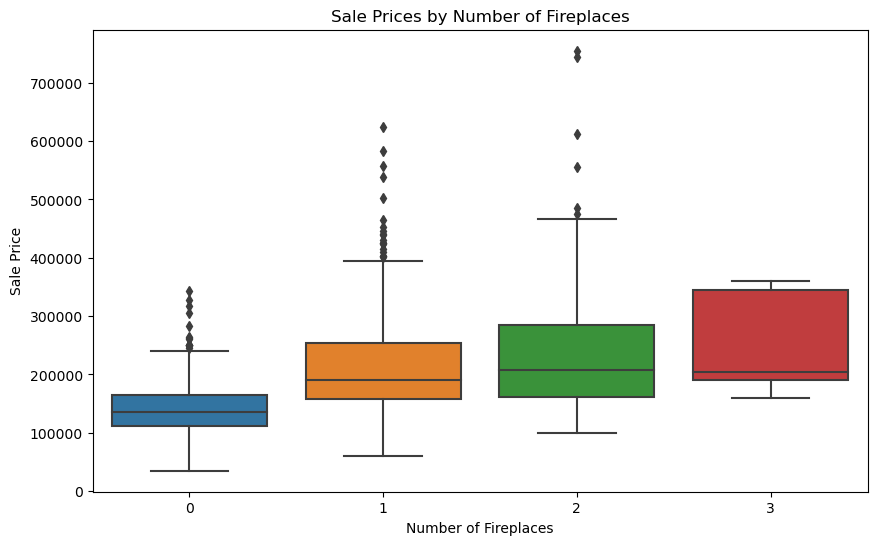

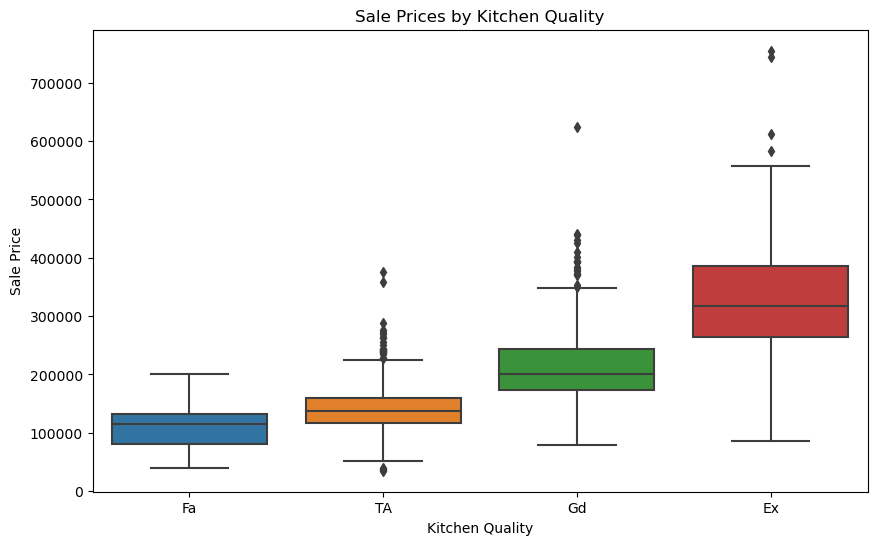

In [12]:
# 1. Visualization for the Impact of Number of Fireplaces on Sale Prices
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fireplaces', y='SalePrice', data=data_original)
plt.title('Sale Prices by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price')
plt.show()

# 2. Visualization for the Impact of Kitchen Quality on Sale Prices
# Since 'KitchenQual' might be affected by dummy conversion, use original data
plt.figure(figsize=(10, 6))
order_quality = ['Fa', 'TA', 'Gd', 'Ex']  # Order by quality from Fair to Excellent
sns.boxplot(x='KitchenQual', y='SalePrice', data=data_original, order=order_quality)
plt.title('Sale Prices by Kitchen Quality')
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price')
plt.show()

## CALCULATION OF MEAN SQUARED ERROR AND R^2 

In [16]:
# Preparing data for modeling
# Using 'data_with_dummies' which includes dummy variables
# Selecting some key features based on EDA insights plus the dummy variables created for categorical features
features = key_variables[:-1]  # remove 'HouseAge' from the key variables list for now
X = data_with_dummies[features]
y = data_with_dummies['SalePrice']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Starting with a simple Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluating the Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Output the MSE and R^2 for Linear Regression
mse_lr, r2_lr


(3.1386631812642224e-21, 1.0)

## VARIATION OF MSE WITH DIFFERENT REGULARIZATION PARAMETERS

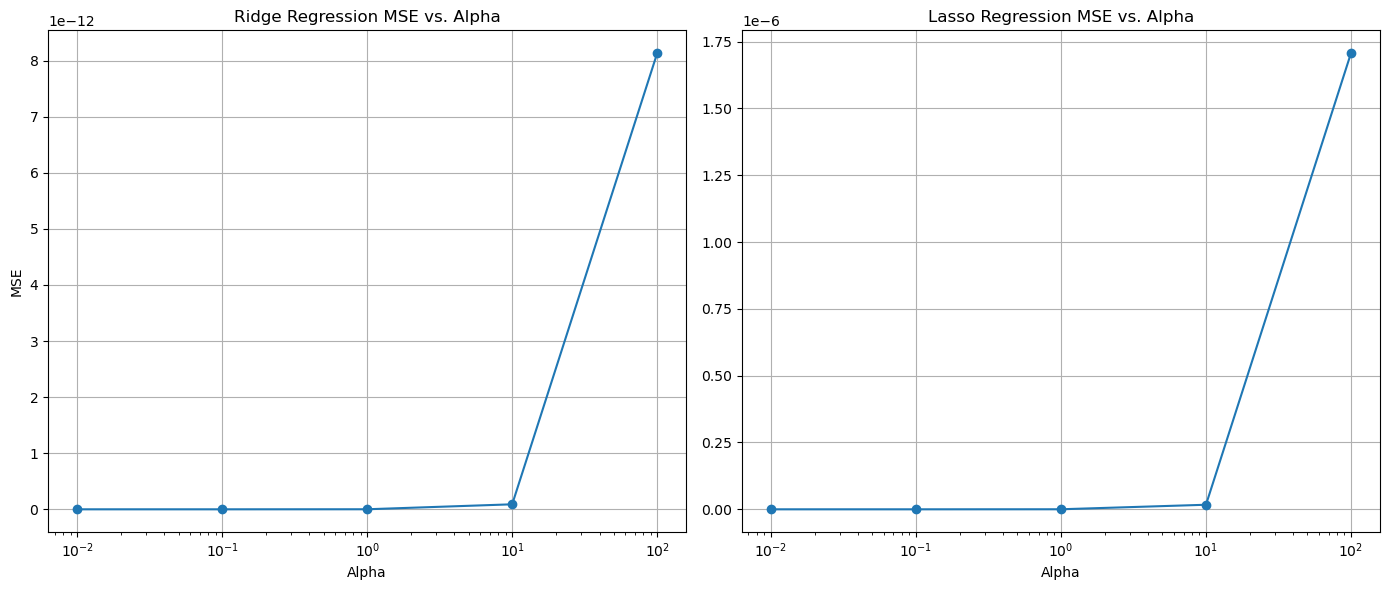

In [12]:
# Define parameters for Lasso
parameters_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso = Lasso()

# Set up GridSearchCV for Lasso
lasso_cv = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)

# Fit Lasso model
X_train, y_train  # Make sure these are defined and contain your data
lasso_cv.fit(X_train, y_train)



# Extract MSE for different alpha values from the Ridge and Lasso CV results
lasso_alphas = [param['alpha'] for param in lasso_cv.cv_results_['params']]
lasso_mse_scores = -lasso_cv.cv_results_['mean_test_score']

parameters_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize the Ridge model
ridge = Ridge()

# Setup GridSearchCV with the updated parameter name
ridge_cv = GridSearchCV(ridge, parameters_ridge, scoring='neg_mean_squared_error', cv=5)

# Ensure your X_train and y_train are defined and contain the data
# This line should define X_train and y_train, make sure they are loaded correctly before this step
X_train, y_train  # This should be replaced with actual data loading code

# Fit GridSearchCV to the training data
ridge_cv.fit(X_train, y_train)

# Now you can safely extract information from ridge_cv
ridge_alphas = [param['alpha'] for param in ridge_cv.cv_results_['params']]
ridge_mse_scores = -ridge_cv.cv_results_['mean_test_score']

# Plotting MSE against alpha values for Ridge and Lasso regression
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ridge_alphas, ridge_mse_scores, marker='o')
plt.title('Ridge Regression MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.xscale('log')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(lasso_alphas, lasso_mse_scores, marker='o')
plt.title('Lasso Regression MSE vs. Alpha')
plt.xlabel('Alpha')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()


## LASSO MODEL COEFFICIENTS VS FEATURES BAR CHART

C:\Users\Nishant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


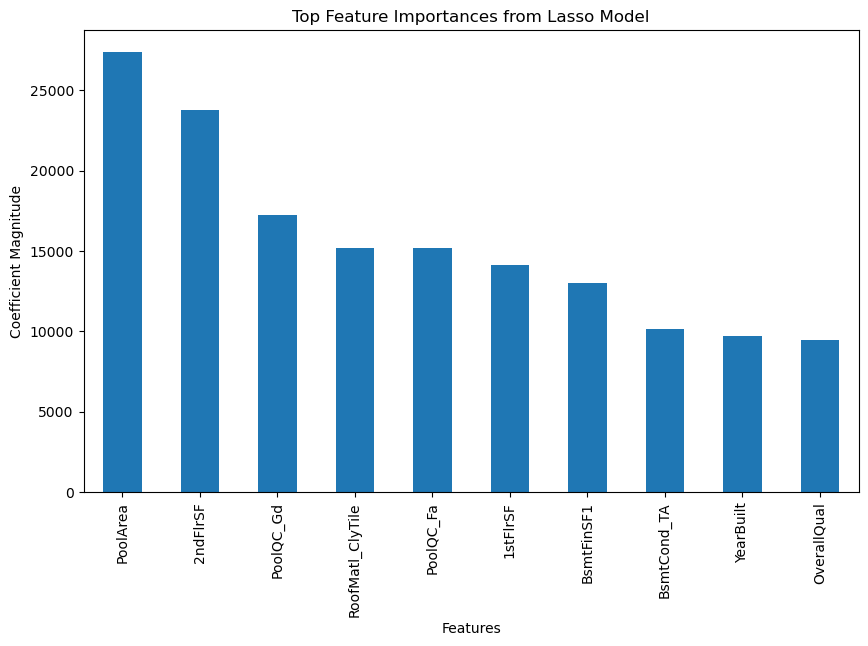

In [14]:
data = pd.read_csv(data_path)
# Preprocessing data for Lasso
# Correct handling of missing values by filling with median for numeric columns only
data = data.fillna(data.median(numeric_only=True))
data = pd.get_dummies(data)  # Convert categorical to dummy variables

# Features and target variable
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso model
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_scaled, y)

# Feature importance from Lasso (coefficients)
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)

# Plotting the feature importance
top_features = lasso_coefs.abs().sort_values(ascending=False).head(10)
top_features.plot(kind='bar', figsize=(10, 6))
plt.title('Top Feature Importances from Lasso Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.show()
